#**1. Importig Library**

In [ ]:
import sys                                                          #Importing System
!{sys.executable} -m pip install -U pandas-profiling[notebook]      # Installing pandas profiling
!jupyter nextension enable --py widgetsnbextension                  #enabling python notebook extension 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
usage: jupyter
       [-h]
       [--version]
       [--config-dir]
       [--data-dir]
       [--runtime-dir]
       [--paths]
       [--json]
       [--debug]
       [subcommand]

Jupyter:
Interactive
Computing

positional arguments:
  subcommand
    the
    subcommand
    to launch

optional arguments:
  -h, --help
    show this
    help
    message and
    exit
  --version
    show the
    versions of
    core
    jupyter
    packages
    and exit
  --config-dir
    show
    Jupyter
    config dir
  --data-dir
    show
    Jupyter
    data dir
  --runtime-dir
    show
    Jupyter
    runtime dir
  --paths
    show all
    Jupyter
    paths. Add
    --json for
    machine-
    readable
    format.
  --json
    output
    paths as
    machine-
    readable
    json
  --debug
    output
    debug
    information
    about paths

Available s
ubcommands:
bundlerexte
nsion
console
kernel
ke

In [ ]:
# !pip install pandas-profiling -q --upgrade                            # Installing pandas profiling
# !pip install catboost -q                                              # Installing Catboost regressor
# !pip install xgboost -q                                               # Installing XGboost regressor

In [ ]:
#!pip install pandas -q --upgrade                                       # Installing pandas profiling

#**Importing Libraries**

In [ ]:
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

import matplotlib.pyplot as plt                                               # Importing pyplot for visualization
%matplotlib inline

#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
import seaborn as sns
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                          # Importing for panel data analysis
from pandas_profiling import ProfileReport                                   # Importing  Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns',None)                                    # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth',None)                                    # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows',None)                                    # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment',None)                                # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)                  # To suppress scientific notation over exponential values
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                           # Importing package numpys (For numerical python)
from datetime import datetime as dt                                          # For datetime funcationality
import warnings                                                              # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                             # Warnings will appear only once
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
from sklearn import metrics                                                   # Calling the metrics for calculating performance metrics
from sklearn import preprocessing                                             # Calling preprocessing for preprocessing of data
from sklearn.preprocessing import StandardScaler                              # Calling StandardScaler for Standardization
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
from sklearn.svm import SVR                                                   # Calling calling support vector Regressor for modelling
from sklearn.decomposition import PCA                                         # Calling PCA for dimentionally reduction
from sklearn.metrics import make_scorer                                       # Calling make_scorer for calculating score
from sklearn.metrics import mean_squared_error                                # Calling mean_squared_error for calculating mean squared error
import zipfile                                                                # Importing Zipfile
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
from scipy import stats                                                       # Importing stats for scipy
from scipy.stats import norm                                                  # Importing norm
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder, MinMaxScaler                  # Importing Encoders
from sklearn.linear_model import LinearRegression, Ridge, Lasso               # Importing Linear Regressor
from sklearn.neighbors import KNeighborsRegressor                             # Importing KNN
from sklearn.ensemble import RandomForestRegressor                            # Importing Random Forest Regressor
from sklearn.ensemble import BaggingRegressor                                 # Importing Bagging Regressor
from sklearn.ensemble import GradientBoostingRegressor                       # Importing GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor                                # Importing DecisionTreeRegressor
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                          # Calling train_test_split for spliting the dataset
from sklearn.model_selection import RandomizedSearchCV                        # Calling RandomizedSearchCV for tuning the model
from sklearn.model_selection import cross_val_score                           # Importing cross_val_score
from sklearn.model_selection import GridSearchCV                              # Importing GridSearchCV
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import mean_squared_error                          # Importing MSE
from sklearn.metrics import r2_score                                    #Importing R squared
from sklearn.metrics import mean_absolute_error                         # Importing MAE
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
import time                                                             # Importing time
import re                                                               # Importing RegEx
import plotly.express as ex                                             # Importing Plotly Express for Dynamic Plotting
import plotly.graph_objs as go                                         # Importing Plotly graph for Dynamic Plotting
import plotly.offline as pyo                                             # Importing offline Express for Dynamic Plotting
from plotly.subplots import make_subplots                               # Importing Plotly subplots to plot Dynamic Subplots
import plotly.figure_factory as ff                                      # Calling the figure factory to create unique chart types

In [ ]:
data = pd.read_csv('/content/salary.csv')
print('Shape of the data is :', data.shape)
data.head()

Shape of the data is : (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.00000,32561.00000,32561.00000,32561.00000,32561.00000,32561.00000
mean,38.58165,189778.36651,10.08068,1077.64884,87.30383,40.43746
std,13.64043,105549.97770,2.57272,7385.29208,402.96022,12.34743
min,17.00000,12285.00000,1.00000,0.00000,0.00000,1.00000
25%,28.00000,117827.00000,9.00000,0.00000,0.00000,40.00000
50%,37.00000,178356.00000,10.00000,0.00000,0.00000,40.00000
75%,48.00000,237051.00000,12.00000,0.00000,0.00000,45.00000
max,90.00000,1484705.00000,16.00000,99999.00000,4356.00000,99.00000


In [ ]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [ ]:
data['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [ ]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
data['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [ ]:
data['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [ ]:
# Fill all NaN values in numeric & text features
data['age'] = data['age'].fillna(0)
data =data.fillna('Unknown')

In [ ]:
data_train = pd.read_csv('/content/train.csv',encoding = 'utf-8')
print('Shape of the training data is :', data_train.shape)
data_train.head()

Shape of the training data is : (19802, 9)


,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC rules; Must Have:;Good analytical skills;Good ...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical skills, problem solving...",Delhi NCR(Vikas Puri),6to10,3687
1,1,10-17 yrs,He should have handled a team of atleast 5-6 direct reportees;mechanical or Diploma (mechanical) with at ...,Head SCM,NaN,"ppc, logistics, inventory management, supply chain management, procurement,...",Sonepat,10to15,458
2,2,5-9 yrs,Must be an effective communicator (written & spoken) and strong in inter personal relationship & ...,Deputy Manager - Talent Management & Leadership Development - Auto,Analytics,"HR Analytics, Employee Engagement, Training, Succession Planning...",Delhi NCR,15to25,4195
3,3,7-10 yrs,7 - 10 years of overall experience in data engineering and Big Data systems;Proficient understanding ...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Analytics, Machine learning...",Bengaluru,10to15,313
4,4,1-3 yrs,Chartered Accountancy degree or MBA in Finance from a premier institute with 1-3 years of experience in ...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial planning, statutory accounting",Gurgaon,3to6,1305


In [ ]:
data_test = pd.read_csv('/content/test.csv',encoding = 'utf-8')
print('Shape of the testing data is :', data_test.shape)
data_test.head()

Shape of the testing data is : (6601, 7)


,experience,job_description,job_desig,job_type,key_skills,location,company_name_encoded
0,7-12 yrs,"Professional experience in Java/J2EE based server-side application developing, troubleshooting and ...",IT Technology Senior Consultant/java/ J2ee/ Sever Application/ SQL/ PL,NaN,"Java, J2Ee, Tomcat, JBoss, Weblogic, Oracle, Elastic Search, Core HR...",Bengaluru,2066
1,0-5 yrs,We are looking for 20+ Fresher/Experienced Candidates for Medical Billing and Insurance Claiming Process ...,Medical Billing Process | International KPO | Insurance Claim | USA,NaN,"Medical Billing, Insurance Processing",Ahmedabad(Sola),2629
2,3-6 yrs,Should understand overall integration framework in cloud;Consultant should have good communication ...,Oracle Sales Cloud Functional Consultant,NaN,"Oracle Sales, Functional Consultancy, Troubleshooting Skills, Communication...",Bengaluru,2448
3,0-3 yrs,NaN,Looking For Freshers WHO WANT To Work WITH US,NaN,"offline, online, internet, part time, home base, work from home, freelancer...","Delhi NCR, Chennai, Hyderabad, Gurgaon, Lucknow, Mumbai",2711
4,0-5 yrs,NaN,Process Associate / Sr Process Associate / Tech Associate - Voice,NaN,"voice support, analytical skills, Process associate, Tech Associate...",Hyderabad,40


In [ ]:
data_train.describe()

,Unnamed: 0,company_name_encoded
count,19802.00000,19802.00000
mean,9900.50000,2379.72387
std,5716.48935,1475.34234
min,0.00000,0.00000
25%,4950.25000,1067.00000
50%,9900.50000,2225.00000
75%,14850.75000,3621.00000
max,19801.00000,5034.00000


In [ ]:
data_test.describe()

,company_name_encoded
count,6601.00000
mean,1319.33071
std,808.15835
min,0.00000
25%,611.00000
50%,1250.00000
75%,2025.00000
max,2751.00000


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19802 entries, 0 to 19801
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            19802 non-null  int64 
 1   experience            19802 non-null  object
 2   job_description       15384 non-null  object
 3   job_desig             19802 non-null  object
 4   job_type              4797 non-null   object
 5   key_skills            19801 non-null  object
 6   location              19802 non-null  object
 7   salary                19802 non-null  object
 8   company_name_encoded  19802 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   experience            6601 non-null   object
 1   job_description       5079 non-null   object
 2   job_desig             6601 non-null   object
 3   job_type              1637 non-null   object
 4   key_skills            6601 non-null   object
 5   location              6601 non-null   object
 6   company_name_encoded  6601 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 361.1+ KB


#**Data Pre-Processing**

#**5.1Pre-Profiling Report**
For Quick analysis pandas profiling is very handy. 
Generates  profile reports  from a pandas dataframe.
for each column Statistics are presented in an interactive HTML report.

In [ ]:
# profile = ProfileReport(df=data_train)
# profile.to_file(output_file= 'Pre Profiling Report.html)
# print('Accomplished')

#**5.2 Data Cleaning**

**Handling of Missing Vaslues**

In [ ]:
# Checking  missing  values in training data
data_train.isna().sum()

Unnamed: 0                  0
experience                  0
job_description          4418
job_desig                   0
job_type                15005
key_skills                  1
location                    0
salary                      0
company_name_encoded        0
dtype: int64

In [ ]:
# Checking  missing  values in testing data
data_test.isna().sum()

experience                 0
job_description         1522
job_desig                  0
job_type                4964
key_skills                 0
location                   0
company_name_encoded       0
dtype: int64

In [ ]:
data_train['job_description'].value_counts()

Accenture Technology powers our clients businesses with innovative technologies established and emerging ...      144
- Experience in Credit card/ banking domain with knowledge across customer lifecycle is must;- Candidate ...       46
- Experience in defining and executing professional software engineering best practices for the full ...           33
- Team management / mentor ship experience is must; Should be good at resolving conflicts;- Experience ...         32
- An advanced degree in Math, Computer Science, Statistics, Physics, or a related field (high GPAs ...             29
- Post-Graduate degree in statistics, finance, mathematics, engineering (Computer Science preferred) or ...        28
Experience leading teams of size 5-15 members;Very good knowledge of statistical techniques such as ...            27
- Good team management, project management and communication (both written and verbal) skills, including ...       27
Utilize strong analytical ability to evaluate end-to-end

In [ ]:
data_test['job_description'].value_counts()

Accenture Technology powers our clients businesses with innovative technologies established and emerging ...       46
- Experience in Credit card/ banking domain with knowledge across customer lifecycle is must;- Candidate ...       23
- Experience in defining and executing professional software engineering best practices for the full ...           14
- Experience in banking domain with knowledge across customer lifecycle is must;- Candidate should have ...        12
- Post-Graduate degree in statistics, finance, mathematics, engineering (Computer Science preferred) or ...        12
- A minimum of three years prior experience in a similar role;- A strong academic background from a top ...        10
Chartered Accountancy degree or MBA in Finance from a premier institute with 1-3 years of experience in ...         9
Experience leading teams of size 5-15 members;Very good knowledge of statistical techniques such as ...             9
- Experience working with large data sets - collection, 

In [ ]:
data_train['job_desig'].value_counts()

Business Analyst                                                          148
Data Scientist                                                             84
Data Analyst                                                               67
Product Manager                                                            60
Home Base Job/ Data Entry/online Work/part Time Work/freelancer work       58
Digital Marketing Manager                                                  54
Digital Marketing Executive                                                44
Analyst                                                                    40
Microsoft Advanced Analytics                                               33
SEO Executive                                                              33
SEO Analyst                                                                29
Associate                                                                  28
Application Developer                                           

In [ ]:
# Fill all NaN values in numeric & text features
data_train['experience'] = data_train['experience'].fillna(0)
data_test['experience'] = data_test['experience'].fillna(0)
data_train = data_train.fillna('Unknown')
data_test =data_train.fillna('Unknown')

#**6.0 Exploratory Data Analysis**

**6.1 Univariate Analysis**

In [ ]:
# Checking the numeric types
data_train.skew()

Unnamed: 0             0.00000
company_name_encoded   0.10992
dtype: float64

In [ ]:
data.skew()

age               0.55874
fnlwgt            1.44698
education-num    -0.31168
capital-gain     11.95385
capital-loss      4.59463
hours-per-week    0.22764
dtype: float64

In [ ]:
data_test.skew()

Unnamed: 0             0.00000
company_name_encoded   0.10992
dtype: float64

In [ ]:
data_train.skew().index

Index(['Unnamed: 0', 'company_name_encoded'], dtype='object')

In [ ]:
data_test.skew().index

Index(['Unnamed: 0', 'company_name_encoded'], dtype='object')

In [ ]:
data.skew().index

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [ ]:
#printing the columns
data_train.columns

Index(['Unnamed: 0', 'experience', 'job_description', 'job_desig', 'job_type',
       'key_skills', 'location', 'salary', 'company_name_encoded'],
      dtype='object')

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [ ]:
# Separating the numerical data
numeric_data = data.loc[:,['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary']]

# Separating the Catogarical data
categorical_data = data.drop(numeric_data,axis=1)

In [ ]:
# Separating the numerical data
numeric_data = data_train.loc[:,['experience','job_description','job_desig','job_type','key_skills','location','salary']]

# Separating the Catogarical data
categorical_data = data_train.drop(numeric_data,axis=1)

If I want to drawn insight a **numerical feature.**

In [ ]:
import seaborn as sns

TypeError: ignored

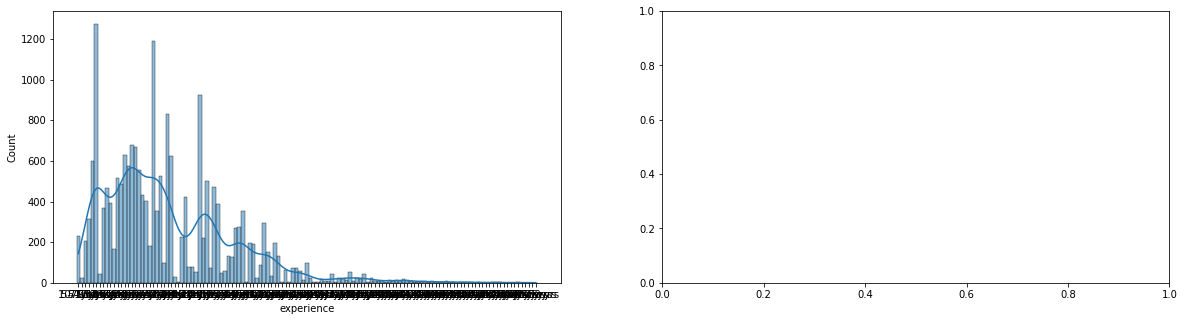

In [ ]:
for col in numeric_data.columns:
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
  sns.histplot(data_train[col], ax=ax[0], kde=True)
  sns.boxplot(col, data=data_train, ax=ax[1])

KeyError: ignored

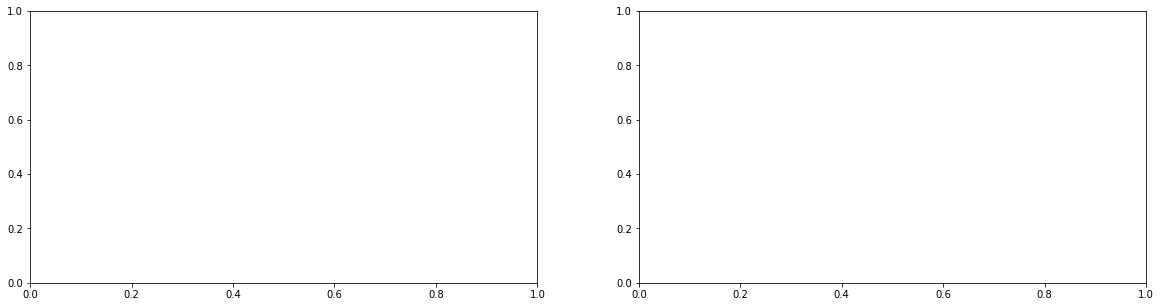

In [ ]:
for col in numeric_data.columns:
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
  sns.histplot(data[col], ax=ax[0],kde=True)
  sns.boxplot(col, data=data, ax=ax[1])
  plot.show()

If I want to drawn insight a **categorical feature.**

In [ ]:
for col in ['job_description','experience']
plt.figure(figsize = [16,6])
sns.countplot(data_train[col])
plt.show()

In [ ]:
plt.figure(figsize=[16,6])
plt.scatter(data_train['Rating'],data_train['Salary'])
plt.xlabel('Rating')
plt.ylabel('Salary amount (in $)')
plt.title('Rating VS Salary')
plt.show();

In [ ]:
plt.figure(figsize = [16,6])
sns.barplot(x='Job', y='Salary', hue='Seniority',data=data_train)

#**7.0 Data Postprocessing**

<a name = Section71></a>
### **7.1 Data encoding**

In [ ]:
size_encoded_train = pd.get_dummies(data_train['Size'])
size_encoded_test = pd.get_dummies(data_test['Size'])

In [ ]:
encoder =  LabelEncoder()
data_train['Age'] =  encoder.fit_transform(data_train['Age'])
data_test['Age'] =  encoder.fit_transform(data_test['Age'])

<a name = Section71></a>
### **7.2 Feature genaration**

In [ ]:
# Categorize salary
def salary_category(salary):

    if 50000 <= salary < 75000:
        return 1
    if 75000 <= salary < 100000:
        return 2
    if 100000 <= salary < 125000:
        return 3
    if 125000 <= salary < 150000:
        return 4
    if 150000 <= salary < 175000:
        return 5
    if 175000 <= salary < 200000:
        return 6

data_train['salary_Categories'] = data_train['salary'].apply(salary_category)
data_test['salary_Categories'] = data_train['salary'].apply(salary_category)

In [ ]:
data_train_processed = pd.concat([data_train,
                                 size_encoded_train], axis = 1)

In [ ]:
data_test_processed = pd.concat([data_test,
                                size_encoded_test], axis =1)

NameError: ignored

<a name = Section71></a>
### **7.3 Feature Dropping**

In [ ]:
data_train_processed.drop(['Job Title','Job Description','Company Name','Revenue',
                          'Size','Type of ownership','Industry',
                          'Sector','City','State','Job','Seniority'], axis=1, inplace = True)

NameError: ignored

In [ ]:
data_test_processed.drop(['Job Title','Job Description','Company Name','Revenue',
                          'Size','Type of ownership','Industry',
                          'Sector','City','State','Job','Seniority'], axis=1 , inplace = True)

NameError: ignored

In [ ]:
data_train_processed.shape, data_test_processed.shape

NameError: ignored

In [ ]:
# Treating some freshly genarated NaN values
data_train_processed['Salary_Categories'] = data_train_processed['Salary_Categories'].replace(np.nan,
                                                                                              data_train_processed['Salary_Categories'].mode()[0])
data_test_processed['Salary_Categories'] = data_test_processed['Salary_Categories'].replace(np.nan,
                                                                                              data_test_processed['Salary_Categories'].mode()[0])

NameError: ignored

<a name = Section72></a>
### **7.4 Feature Extraction**

In [ ]:
# Defining train and test data
X = data_train_processed.drop(['Salary'], axis =1)
y = data_train_processed['Salary']


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 42)

NameError: ignored

<a id=section7></a>

---
# **8. Model Building**
---

### **8.1 Defining Baseline Models**

In [ ]:
# Defining the scores list
model_scores = []

# Defining a list of useful regressors
regressors = [RandomForestRegressor(random_state=42), 
              KNeighborsRegressor(),
              GradientBoostingRegressor(random_state=42),
              CatBoostRegressor(random_state=42),
              XGBRegressor(random_state=42),
              BaggingRegressor(random_state=42)]

NameError: ignored

In [ ]:
for reg in regressors:
  # Extracting model name
  model_name = type(reg).__name__

  # Fit the model on train data
  reg.fit(X_train, y_train)

  # Make predictions using train data
  y_train_pred = reg.predict(X_train)

  # Make predictions using test data
  y_pred = reg.predict(X_test)

  # Calculate train rmse of the model
  reg_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

  # Calculate test rmse of the model
  reg_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  
  # Calculating train R2 Score
  reg_train_r2 = r2_score(y_train, y_train_pred)

  # Calculating test R2 Score
  reg_test_r2 = r2_score(y_test, y_pred)

  # Display the accuracy of the model
  print('Performance Metrics for', model_name, ':')
  print('[RMSE-Score Train]:', reg_train_rmse)
  print('[RMSE-Score Test]:', reg_test_rmse)
  # print('[R2-Score Train]:', reg_train_r2)
  # print('[R2-Score Test]:', reg_test_r2)

  model_scores.append((model_name,
                       reg_train_rmse,
                       reg_test_rmse))

  print('--------------------\n')

NameError: ignored

In [ ]:
models = pd.DataFrame(data=model_scores, columns=['Model', 'Train RMSE', 'Test RMSE'])
models

,Model,Train RMSE,Test RMSE


In [ ]:
# Plotting the RMSE scores for each model
fig = plt.figure(figsize=(15,7))
sns.barplot((models['Test RMSE']), models['Model'], palette='rocket')
plt.grid(b=True)

ValueError: ignored

<Figure size 1080x504 with 0 Axes>

### **8.2 Hyperpameter tuning**

In [ ]:
# Creating a parameter grid for CatBoost Regressor
param_grid_cat  = {'iterations': [100, 150, 200],
                   'learning_rate': [0.03, 0.1],
                   'depth': [2, 4, 6, 8],
                   'l2_leaf_reg': [0.2, 0.5, 1, 3]}

cbr = CatBoostRegressor(random_state=42)
gscv = RandomizedSearchCV(estimator = cbr,
                          param_distributions = param_grid_cat,
                          scoring ='r2',
                          cv = 5)
gscv.fit(X_train, y_train)

# Printing metrics
print("[Hyperparameters]:", gscv.best_params_)
print("[Train Score]:", gscv.best_score_)
print("[Validation Score]:", r2_score(y_test,
                                      gscv.predict(X_test)))

NameError: ignored

# **9. Test Set**

In [ ]:
# Predicting with the best fit parameters
best_fit = gscv.best_estimator_
best_fit.fit(X_train, y_train)

NameError: ignored

In [ ]:
# storing all best tvalues in to y_pred_tuned
y_pred_tuned = best_fit.predict(data_test_processed)

NameError: ignored

In [ ]:
# Making the submission file
submission = pd.DataFrame({'Id': data_test_processed['Id'], 'Salary': y_pred_tuned})
submission.head(10)

NameError: ignored

In [ ]:
y_actual = pd.read_csv('/content/test.csv',header= None)

In [ ]:
# Calculating the R2 Score in between the actual Purchase and predicted Purchase
print('[R2 Score Test]:', r2_score(y_actual.iloc[:,1],submission['Salary']))

NameError: ignored

In [ ]:
submission.to_csv('submission.csv', header = False, index = False)

NameError: ignored